Загружаем зависимости

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

Загружаем данные

In [205]:
data = pd.read_csv('train.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


Удаляем все дубликаты и null из данных

In [206]:
transformed_data = data.dropna().drop_duplicates()

Посмотрим на то, как распределяется наш risk score

<Axes: ylabel='Frequency'>

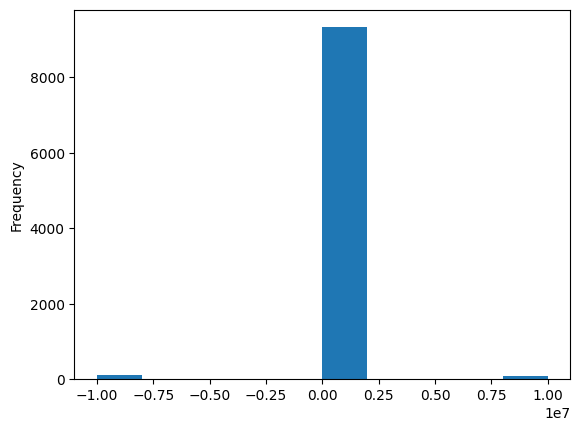

In [207]:
transformed_data['RiskScore'].plot.hist()

Не очень похоже на правду из-за сильно выбивающихся значений, уберём их и попробуем ещё раз

<Axes: ylabel='Frequency'>

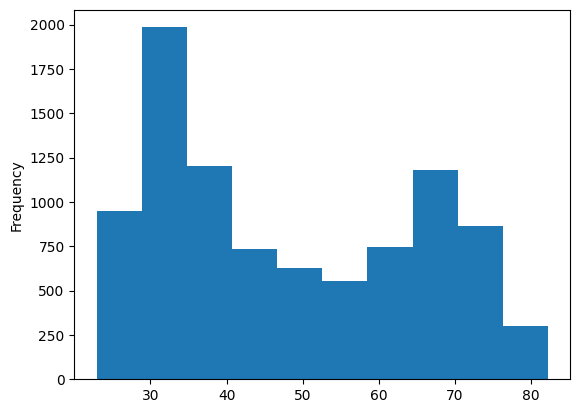

In [208]:
quatile_low, quantile_high = [
  transformed_data['RiskScore'].quantile(q=0.02),
  transformed_data['RiskScore'].quantile(q=0.98),
]

transformed_data = transformed_data[
  transformed_data['RiskScore'].between(quatile_low, quantile_high)
]

transformed_data['RiskScore'].plot.hist()

Теперь больше похоже на правду

Следующим шагом замаппим нечисловые значения в числовые

Было:

In [209]:
for column in data.select_dtypes(include=['object']).columns:
    print(f'{column}: {data[column].unique()}')

ApplicationDate: ['2010-06-26' '1996-09-23' '2015-01-19' ... '2010-11-07' '2001-12-28' nan]
MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single' nan]
HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own' nan]
LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other' nan]
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate' nan]


In [210]:
transformed_data = transformed_data.copy()
transformed_data.drop(['ApplicationDate'], axis=1, inplace=True)

def transform_object_columns(dataframe):
  for column in dataframe.select_dtypes(include=['object']).columns:
    dataframe[column] = TargetEncoder().fit_transform(
      dataframe[column].values.reshape(-1, 1),
      dataframe[column].values
    )
  
  return dataframe

transform_object_columns(transformed_data)

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1.0,0.0,1095.0,0.151985,...,1.0,1.0,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,55.0,172147.0,850.0,16110.0,36.0,0.0,1.0,1.0,211.0,0.175693,...,1.0,0.0,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,51.0,300000.0,850.0,38436.0,36.0,0.0,0.0,1.0,546.0,0.444605,...,1.0,0.0,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,25.0,34683.0,847.0,19186.0,48.0,0.0,0.0,0.0,153.0,0.188452,...,1.0,0.0,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,55.0,300000.0,850.0,30437.0,48.0,0.0,2.0,0.0,562.0,0.273431,...,1.0,0.0,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,31.0,300000.0,850.0,14503.0,60.0,0.0,2.0,1.0,185.0,0.056431,...,1.0,0.0,10.0,6992.0,0.104503,0.113622,317.956385,0.020118,1.0,34.037970
9995,27.0,15000.0,361.0,19505.0,36.0,0.0,1.0,0.0,622.0,0.409411,...,1.0,0.0,2.0,31346.0,0.334005,0.346203,878.142786,1.200114,0.0,76.185933
9996,49.0,185082.0,573.0,7447.0,84.0,0.0,0.0,1.0,946.0,0.095426,...,1.0,0.0,27.0,14016.0,0.255947,0.235055,181.438855,0.073099,1.0,41.213393
9997,55.0,296728.0,850.0,44162.0,84.0,1.0,2.0,1.0,479.0,0.373804,...,1.0,0.0,33.0,3624.0,0.154162,0.144973,839.774585,0.053333,1.0,43.699684


Стало:

In [211]:
for column in transformed_data[[
    'MaritalStatus',
    'HomeOwnershipStatus',
    'LoanPurpose',
    'EmploymentStatus',
    'EducationLevel',
]].columns:
    print(f'{column}: {transformed_data[column].unique()}')

MaritalStatus: [1. 0.]
HomeOwnershipStatus: [0. 1.]
LoanPurpose: [0. 1.]
EmploymentStatus: [1. 0.]
EducationLevel: [1. 0.]


Посмотрим на корелляционнцю матрицу и удалим признаки, которые сильно коррелируют

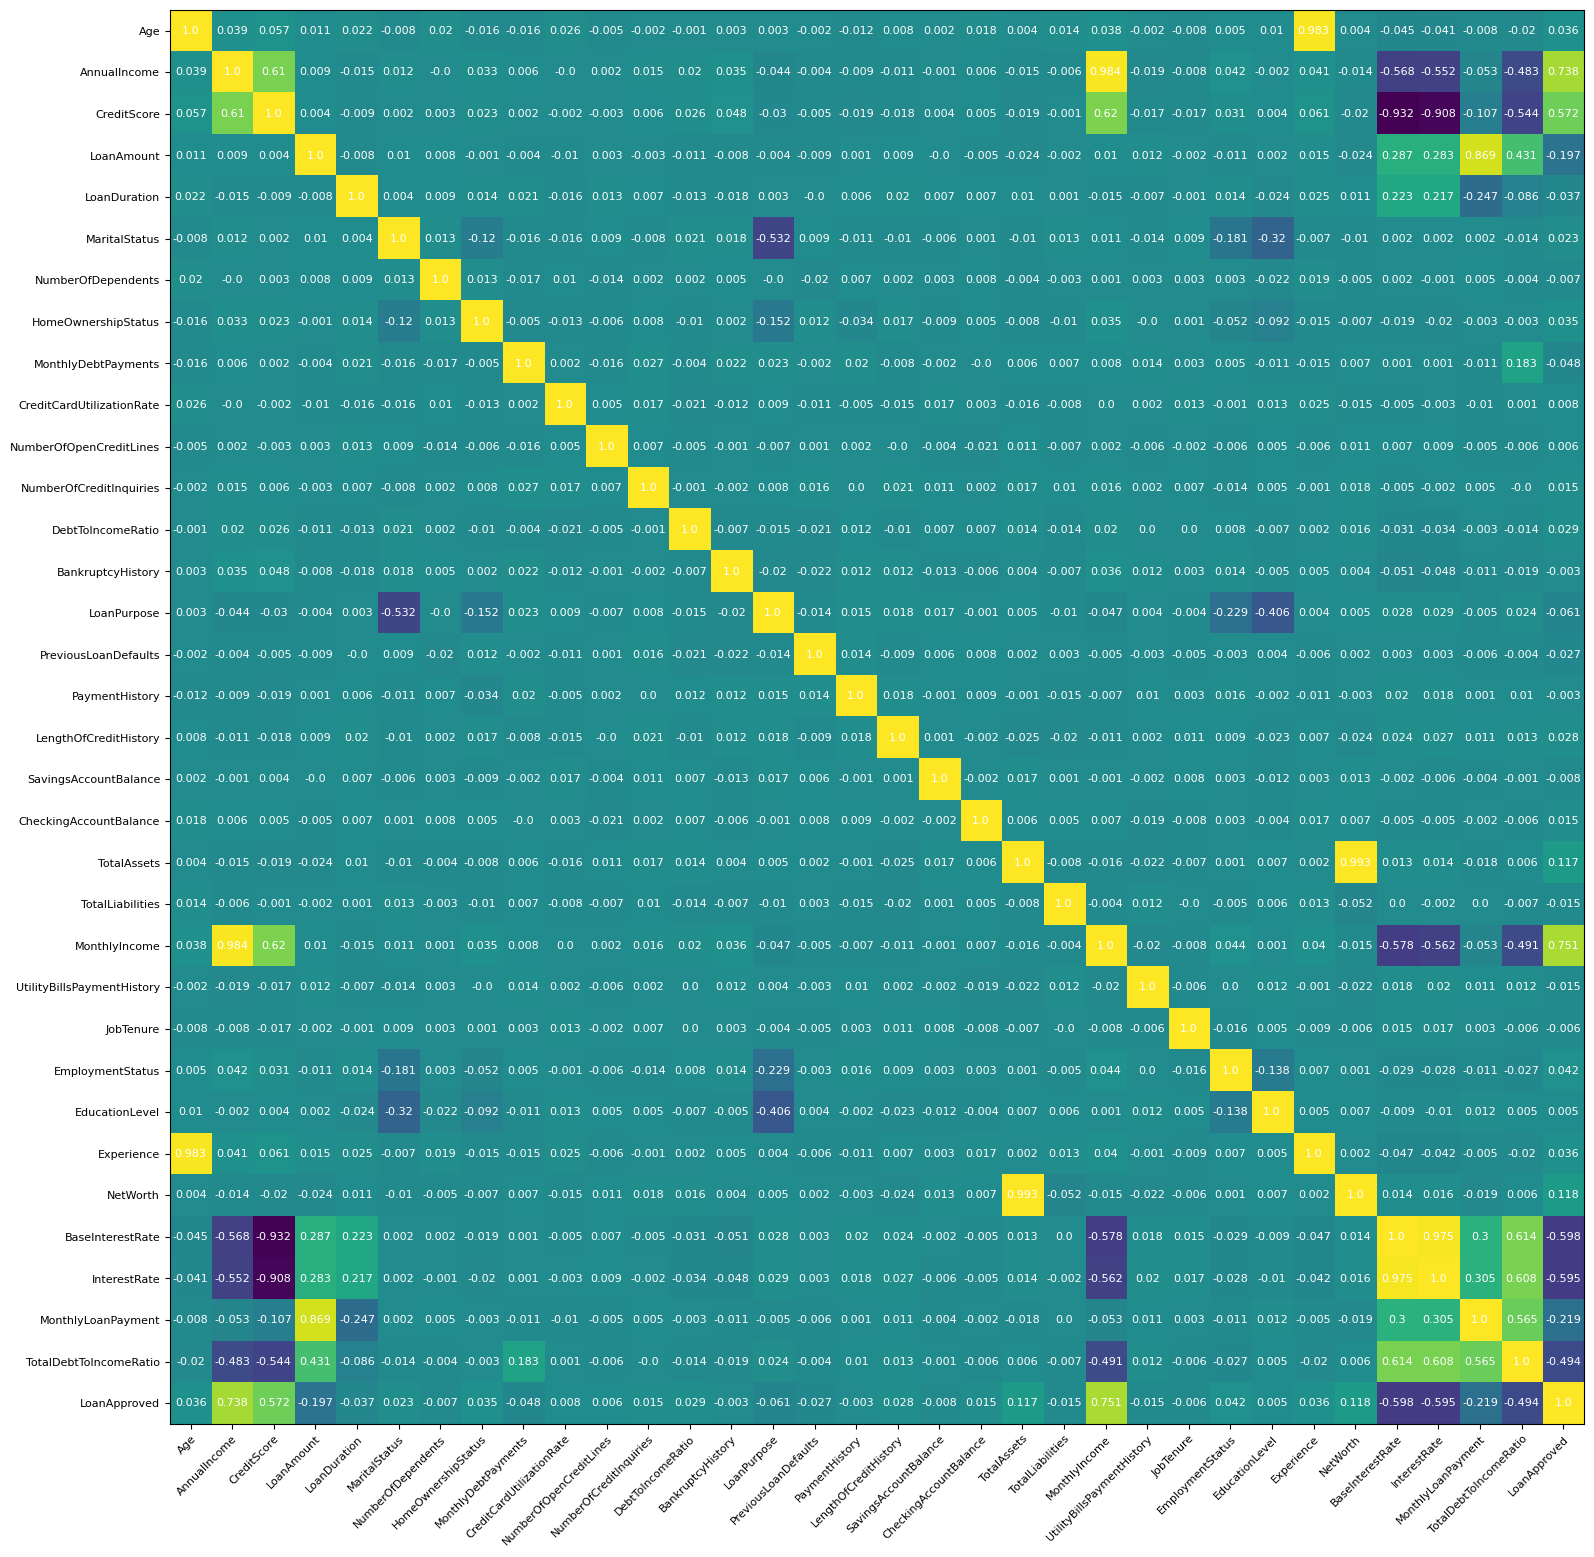

In [212]:
up_for_transformation = transformed_data.copy(True)
correlation = up_for_transformation.drop(['RiskScore'], axis=1).corr()

fig, ax = plt.subplots()
im = ax.imshow(correlation)

fig.set_figwidth(16)
fig.set_figheight(16)

ax.set_xticks(
  np.arange(len(correlation.columns)),
  correlation.columns,
  fontsize=8,
  rotation=45,
  ha="right",
  rotation_mode="anchor")
ax.set_yticks(
  np.arange(len(correlation.columns)),
  correlation.columns,
  fontsize=8
)

for i in range(len(correlation.columns)):
  for j in range(len(correlation.columns)):
    ax.text(
      i, j, correlation[correlation.columns[i]][correlation.columns[j]].round(3), ha="center", va="center", color="w", fontdict={'size': 8}
    )

fig.tight_layout()
plt.show()

Отсюда видно, что можно удалить ['BaseInterestRate', 'Experience', 'TotalAssets', 'MonthlyIncome', 'MonthlyLoanPayment']

In [213]:
transformed_data.drop(
  ['BaseInterestRate', 'Experience', 'TotalAssets', 'MonthlyIncome', 'MonthlyLoanPayment'], axis=1, inplace=True
)

Обучим модель

In [214]:
x_train, x_test, y_train, y_test = train_test_split(
    transformed_data.drop(['RiskScore'], axis=1),
    transformed_data['RiskScore'],
    test_size=0.2,
    random_state=10
)

def train_and_test(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
  model.fit(x_train, y_train)

  y_train_prediction = model.predict(x_train)
  y_test_prediction = model.predict(x_test)

  print(f'MSE train: {mean_squared_error(y_train, y_train_prediction)}')
  print(f'MSE test: {mean_squared_error(y_test, y_test_prediction)}')

In [215]:
model = LinearRegression()
train_and_test(model)

MSE train: 18.043763703931884
MSE test: 20.046983686569224


Сравненим с другой linear model - Lasso

In [216]:
model = Lasso(alpha=0.1)
train_and_test(model)

MSE train: 19.579948808831183
MSE test: 21.250338440168484


Воспользуемся моделью на тестовых данных и закинем их в .csv

In [222]:
test_data = pd.read_csv('test.csv')
transform_object_columns(test_data.drop(['ApplicationDate'], axis=1)).drop([
    'ID',
    'BaseInterestRate',
    'Experience',
    'TotalAssets',
    'MonthlyIncome',
    'MonthlyLoanPayment'
  ], axis=1)

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,CheckingAccountBalance,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,NetWorth,InterestRate,TotalDebtToIncomeRatio,LoanApproved
0,49,207095,850,14458,60,0.0,0,0.0,376,0.077124,...,619,25585,0.883232,6,1.0,0.0,10626,0.125350,0.040650,1
1,28,64653,674,65491,48,0.0,2,0.0,238,0.073977,...,710,18282,0.791928,3,1.0,0.0,299024,0.260561,0.454410,0
2,41,300000,768,16811,60,0.0,1,0.0,469,0.331499,...,623,6136,0.805826,3,1.0,0.0,6979,0.154571,0.034919,1
3,50,300000,850,48737,36,1.0,0,1.0,567,0.544696,...,10749,93806,0.829294,3,0.0,0.0,8438,0.099712,0.085558,1
4,35,300000,672,51916,60,0.0,6,1.0,106,0.436103,...,2926,2852,0.735013,7,1.0,1.0,436216,0.237727,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,300000,850,12696,60,0.0,1,0.0,434,0.062521,...,1557,10089,0.914606,3,0.0,0.0,10957,0.094445,0.028012,1
4996,39,75014,572,49380,48,0.0,0,1.0,97,0.057142,...,963,15013,0.862521,3,1.0,0.0,7587,0.302377,0.301033,0
4997,43,15000,454,32810,72,1.0,1,0.0,289,0.403643,...,565,11420,0.754070,6,1.0,0.0,403922,0.283165,0.992585,0
4998,53,98467,850,28446,96,0.0,1,0.0,213,0.137445,...,112,805201,0.964434,6,0.0,0.0,5652,0.163516,0.090910,0


In [223]:
test_data = pd.read_csv('test.csv')

model = LinearRegression()
train_and_test(model)
predicted_risk_score = model.predict(
  transform_object_columns(test_data.drop(['ApplicationDate'], axis=1)).drop([
    'ID',
    'BaseInterestRate',
    'Experience',
    'TotalAssets',
    'MonthlyIncome',
    'MonthlyLoanPayment'
  ], axis=1)
)

result = pd.DataFrame({
  'ID': test_data['ID'],
  'RiskScore': predicted_risk_score
})

result.to_csv('result.csv', index=False)

MSE train: 18.043763703931884
MSE test: 20.046983686569224
